In [58]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util
import plot as sds_plt

import numpy as np
#import cupy as cp
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pyshtools
import pickle

comment = "Plots for the implementation section of seqsim article"
nb_name = "nb_article_implementation_plots"

In [85]:
e_vec = np.ones((1,10))
print(e_vec)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [88]:
u_vec = np.arange(0,10).reshape(-1,1)
print(u_vec)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [89]:
u_vec@e_vec

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [91]:
data_sorted = np.sort(core.data)

<IPython.core.display.Javascript object>


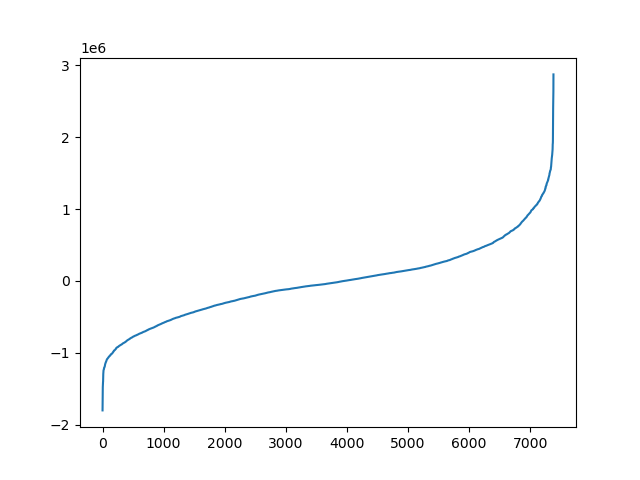

<IPython.core.display.Javascript object>


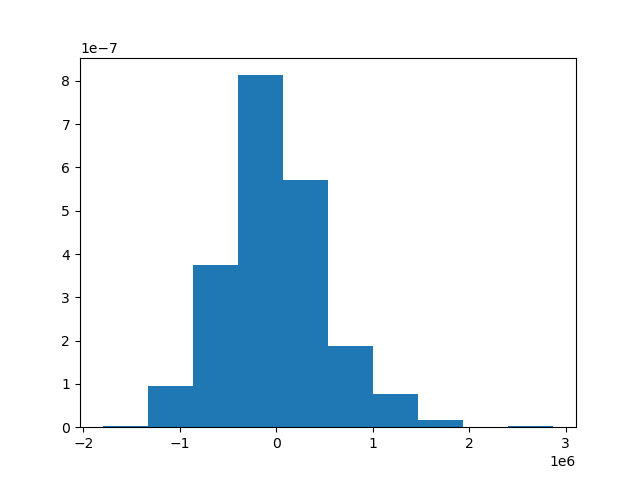

In [95]:
plt.figure()
plt.plot(data_sorted)
plt.show()

plt.figure()
plt.hist(core.data, density = True)
plt.show()

In [103]:
print(core)


______current attributes______

a:                  6371.2
r_sat:              6721.2
r_cmb:              3480.0
rad:                0.017453292519943295
mu0:                1.2566370614359173e-06
comment:            Plots for the implementation section of seqsim article
class_abs_path:     /home/mikotz/spherical_direct_sequential_simulation
N_SH:               30
N_SH_secondary:     None
sim_type:           core
grid_glq_zero:      (61,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools: (61,), Max/Min: 0.05 / 0.00
grid_glq_shape:     (2,), Max/Min: 121.00 / 61.00
grid_glq_w:         (7381,), Max/Min: 0.05 / 0.00
grid_glq_radial:    (7381,), Max/Min: 3480.00 / 3480.00
grid_glq_theta:     (7381,), Max/Min: 177.76 / 2.24
grid_glq_phi:       (7381,), Max/Min: 357.02 / 0.00
grid_glq_N:         7381
grid_glq_nmax:      60
r_grid:             3480.0
grid:               (7381, 2)
sph_d:              (7381, 7381)
lon:                (7381,), Max/Min: 357.02 / 0.00
lat:                (7381,), Max/Mi

In [104]:
print(s_sat)


______current attributes______

a:                6371.2
r_sat:            6721.2
r_cmb:            3480.0
rad:              0.017453292519943295
mu0:              1.2566370614359173e-06
comment:          Plots for the implementation section of seqsim article
class_abs_path:   /home/mikotz/spherical_direct_sequential_simulation
N_SH:             30
N_SH_secondary:   None
sim_type:         core
swarm_theta:      (2773,), Max/Min: 177.35 / 22.39
swarm_phi:        (2773,), Max/Min: 179.68 / -179.59
swarm_radius:     (2773,), Max/Min: 6825.19 / 6806.85
swarm_obs:        (2773,), Max/Min: 53117.43 / -48881.72
swarm_N:          2773
r_grid:           (2773,), Max/Min: 6825.19 / 6806.85
grid:             (2773, 2)
sph_d:            None
lon:              (2773,), Max/Min: 179.68 / -179.59
lat:              (2773,), Max/Min: 67.61 / -87.35
N_grid:           2773
B_ensemble_swarm: (2773, 3)
data:             (2773,), Max/Min: 85904.00 / -84359.04
target_var:       2650032519.9717584
target_mea

In [336]:
theta_s, theta_d, phi_s, phi_d = map(np.radians, 
                                     [90-core.grid_glq_theta, 90-s_sat.swarm_theta, 
                                      core.grid_glq_phi-180, s_sat.swarm_phi-180])

In [337]:
theta_diff = theta_s.reshape(1,-1) - theta_d.reshape(-1,1)
theta_diff[abs(theta_diff)>np.pi/4] = 0.0

phi_diff = phi_s.reshape(1,-1) - phi_d.reshape(-1,1)
phi_diff[abs(phi_diff)>np.pi/4] = 0.0


r_diff =  s_sat.swarm_radius.reshape(-1,1) - np.ones((1,core.N_grid))*core.r_cmb
r_diff[abs(phi_diff)>np.pi/4] = 0.0
r_diff[abs(theta_diff)>np.pi/4] = 0.0

norm_len = np.sqrt(theta_diff**2 + phi_diff**2 + r_diff**2) #  

G_norm = np.pi/60*norm_len*core.grid_glq_w

In [338]:
sat_G_norm = G_norm@core.data

In [339]:
m_diff_lsq = np.linalg.lstsq(G_norm, sat_G_norm, rcond = None)

In [340]:
m_diff_lsq

(array([-60502.98131894, -60235.00780978, -57241.38343088, ...,
        -77182.29768517, -77182.29768517, -77182.29768517]),
 array([], dtype=float64),
 137,
 array([2.86877136e+04, 1.04257732e-04, 1.02165063e-04, ...,
        4.79070973e-13, 2.89540887e-13, 1.00306535e-13]))

<IPython.core.display.Javascript object>


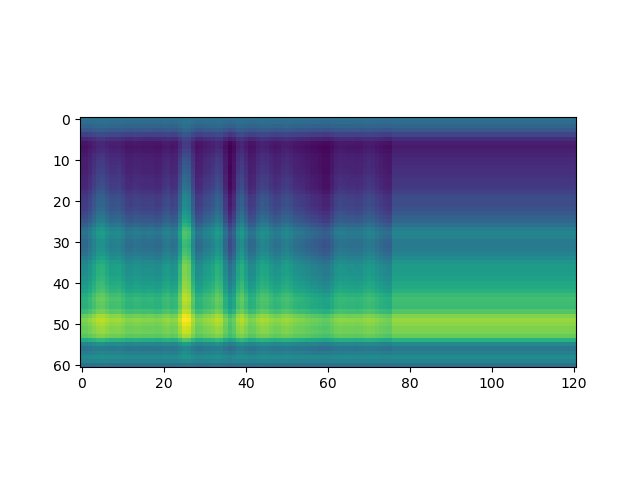

<IPython.core.display.Javascript object>


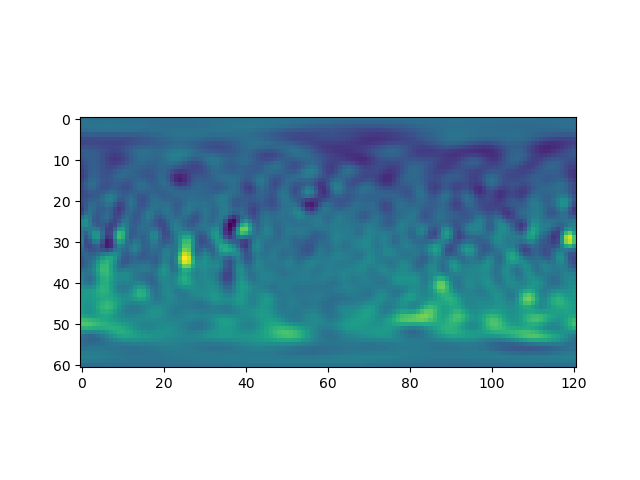

In [341]:
plt.figure()
plt.imshow(m_diff_lsq[0].reshape(60+1,2*60+1))
plt.show()

plt.figure()
plt.imshow(core.data.reshape(60+1,2*60+1))
plt.show()

<IPython.core.display.Javascript object>


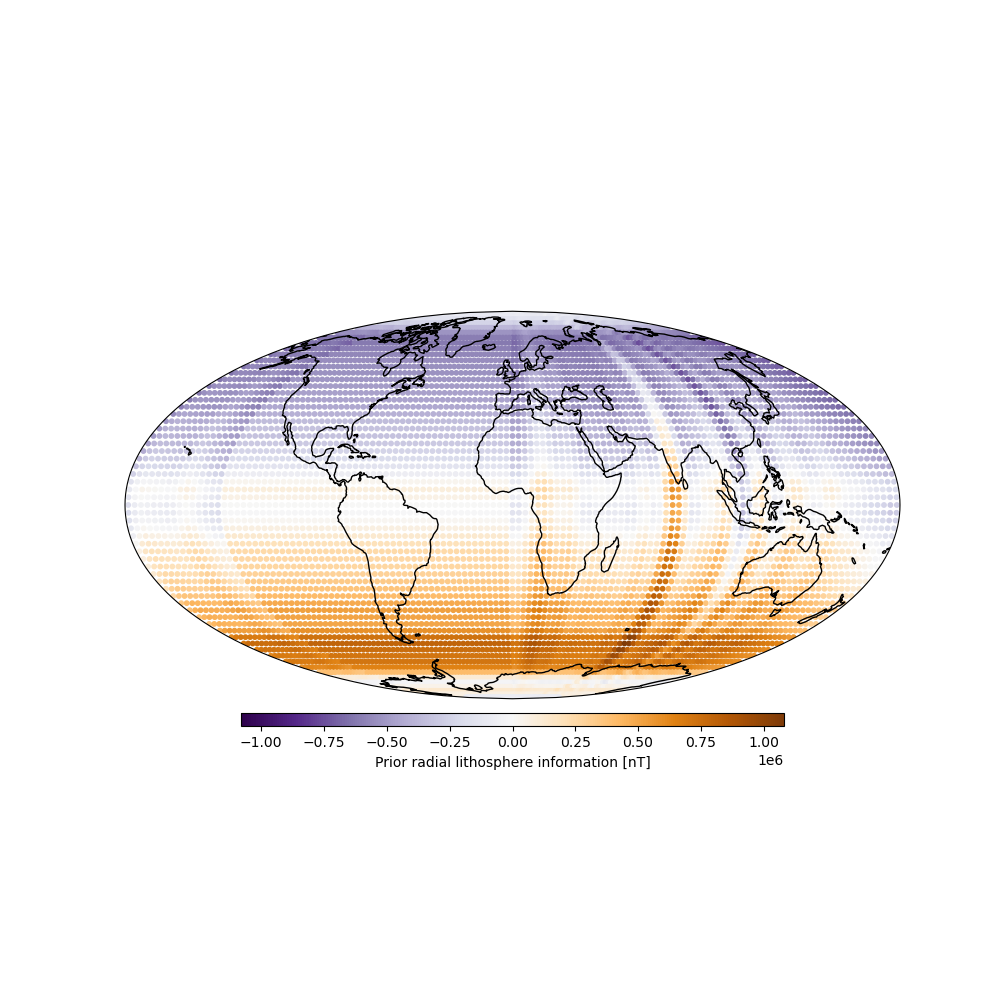

In [342]:
mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=m_diff_lsq[0], point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="Prior radial lithosphere information")

<IPython.core.display.Javascript object>


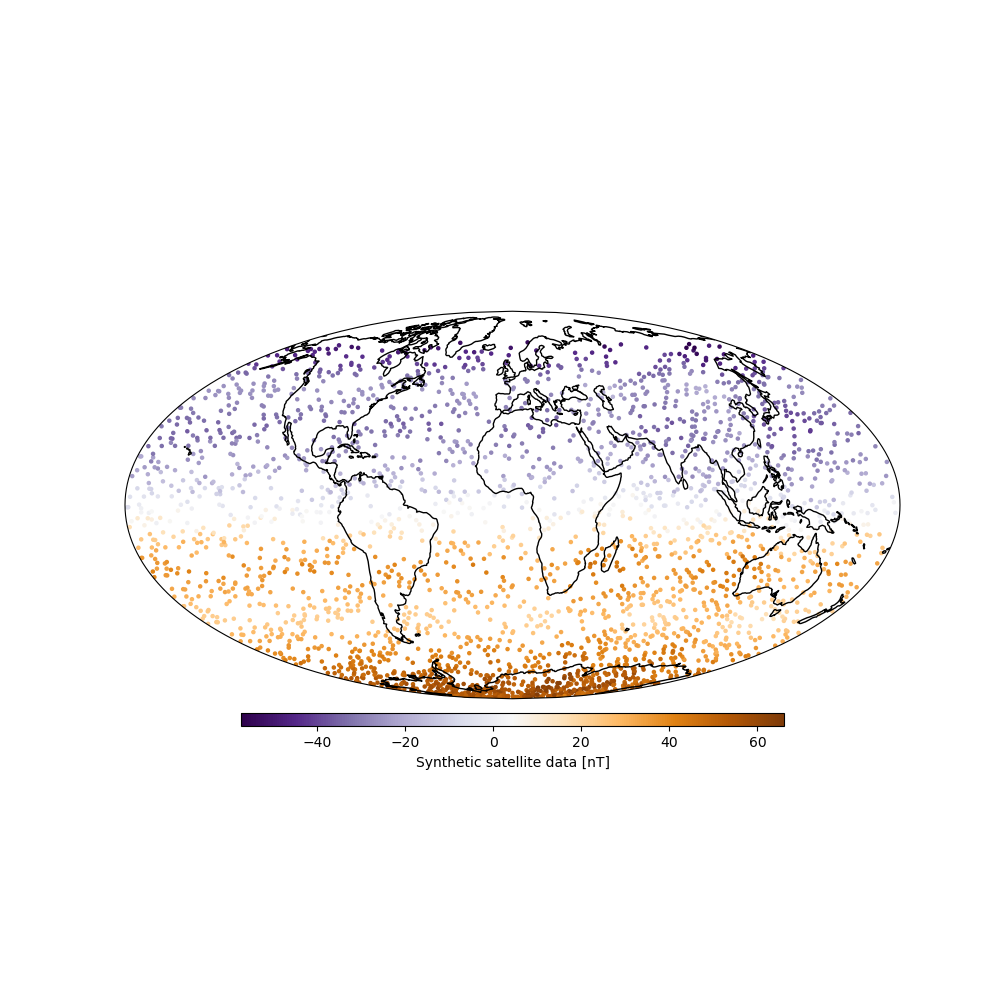

In [343]:
mt_util.plot_cartopy_global(lat = s_sat.lat, lon = s_sat.lon, plot_quality = "high", point_size=5, 
                            data=sat_G_norm, cmap = 'PuOr_r', title="Synthetic satellite data", scale_uneven = True)

In [112]:
theta_diff.shape

(2773, 7381)

<IPython.core.display.Javascript object>


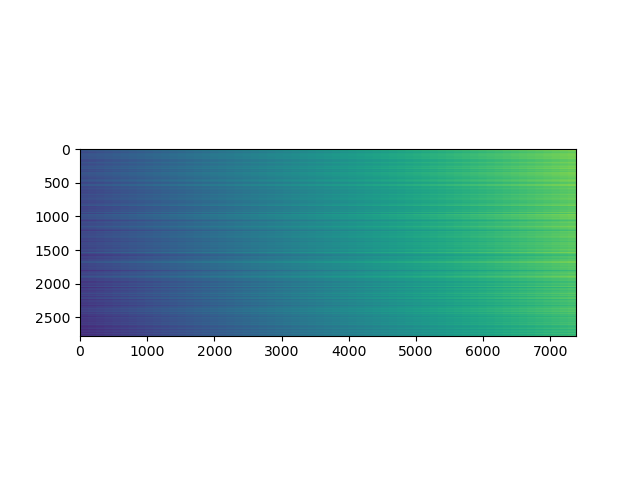

<IPython.core.display.Javascript object>


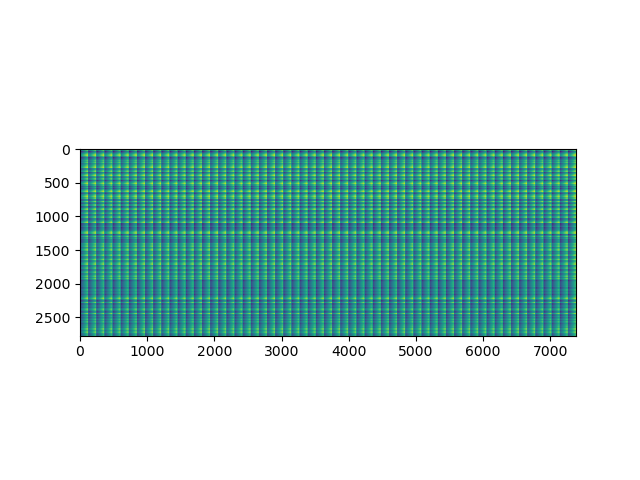

In [117]:
plt.figure()
plt.imshow(theta_diff)
plt.show()

plt.figure()
plt.imshow(phi_diff)
plt.show()

# Core

In [2]:
core = SDSS(comment, N_SH = 30, sim_type = "core", sat_height = 350)

core.grid_glq(nmax = 60, r_at = core.r_cmb)

grid_in = np.array([core.grid_glq_phi, 90-core.grid_glq_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = True)


In [3]:
core.generate_map()

<IPython.core.display.Javascript object>


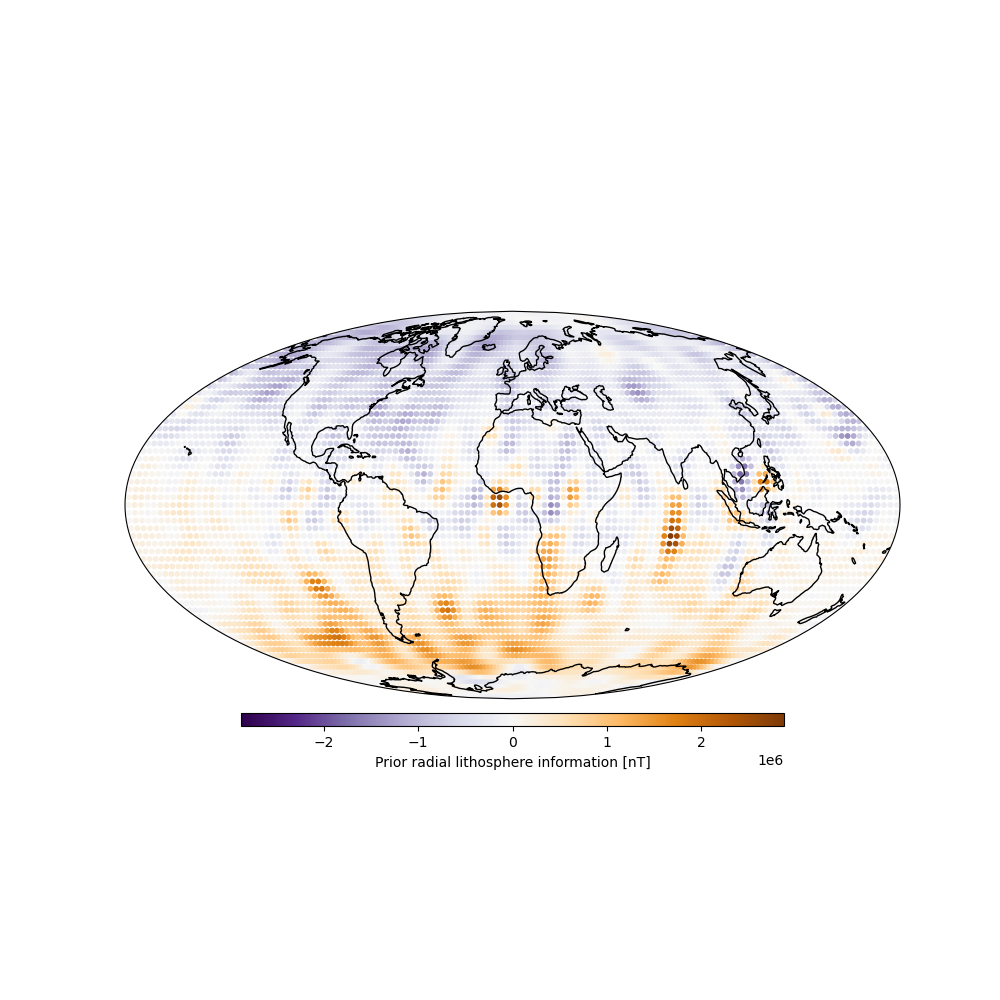

In [4]:
mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=core.data, point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="Prior radial lithosphere information")

<IPython.core.display.Javascript object>


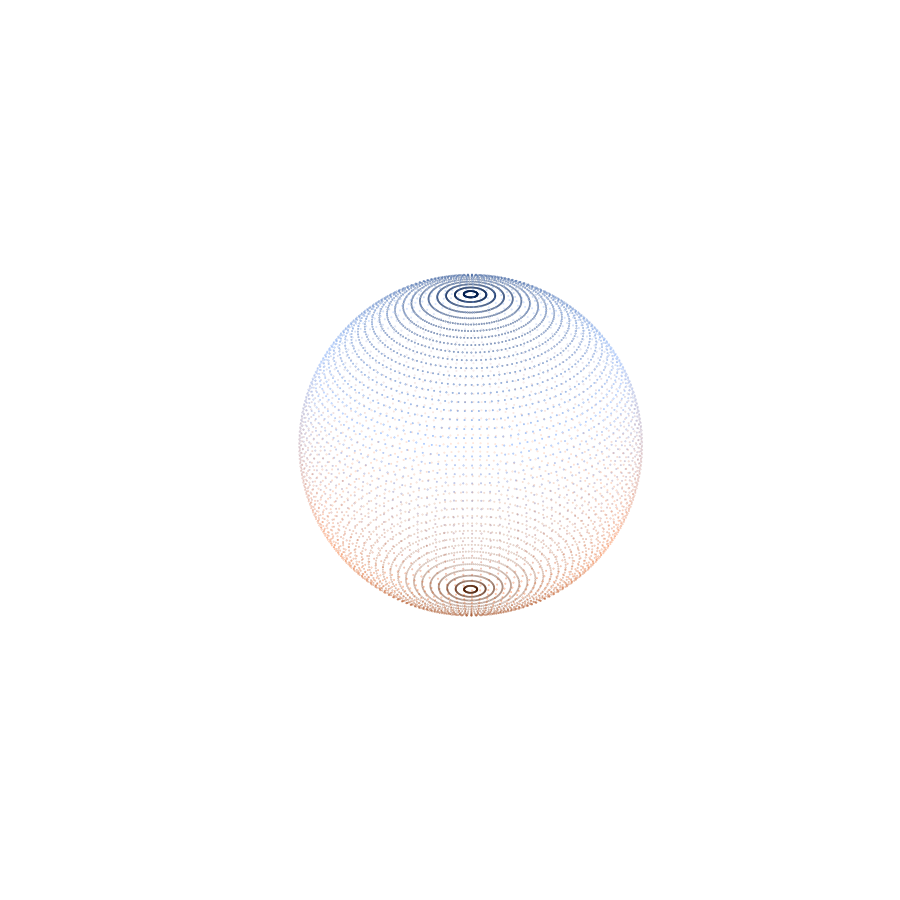

In [217]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#phi = np.linspace(0, np.pi, 100)
#theta = np.linspace(0, 2*np.pi, 100)
#phi, theta = np.meshgrid(phi, theta)

phi = core.lon.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1)*np.pi/180
theta = (90 - core.lat.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1))*np.pi/180

#phi = core.lon*np.pi/180
#theta = (90 - core.lat)*np.pi/180

# The Cartesian coordinates of the unit sphere
x = core.r_cmb*np.sin(theta) * np.cos(phi)
y = core.r_cmb*np.sin(theta) * np.sin(phi)
z = core.r_cmb*np.cos(theta)

theta_sph = np.arange(0,np.pi+0.1,step=0.1)
phi_sph = np.arange(0,np.pi*2+0.1, step=0.1)
theta_sph, phi_sph = np.meshgrid(theta_sph,phi_sph)

x_sph = core.r_cmb*np.sin(theta_sph) * np.cos(phi_sph)
y_sph = core.r_cmb*np.sin(theta_sph) * np.sin(phi_sph)
z_sph = core.r_cmb*np.cos(theta_sph)

#c = "C1"
#cmap = colors.LinearSegmentedColormap.from_list(
#        'incr_alpha', [(0, (*colors.to_rgb(c),0)), (1, c)])

cmap = [(0.0,  0.10980392156862745,  0.30196078431372547), 
                   (0.5019607843137255,  0.6862745098039216,  1.0), 
                   (1.0,  0.5372549019607843,  0.30196078431372547), 
                   (0.30196078431372547,  0.10196078431372549,  0.0)]



cmap = colors.LinearSegmentedColormap.from_list("cmap", cmap, N=1000)


#fig = plt.figure(figsize=(9,9), dpi = 100)
#ax = fig.add_subplot(111, projection='3d')

#patches = ax.scatter(x, y, z, s = 0.1, color="C1")

#camera = get_camera_position(ax)
# distance of patches from camera
#d = np.square(np.subtract(camera, patches._offsets3d)).sum(0)

#plt.close(fig)

fig = plt.figure(figsize=(9,9), dpi = 100)
ax = fig.add_subplot(111, projection='3d')

#sph_surface = ax.plot_surface(x_sph,y_sph,z_sph,rstride=1, cstride=1,color="w")
#sph_surface.zsort = "average"
sph_glq = ax.scatter(x, y, z, s = 0.1, cmap = cmap, c=theta)
#sph_glq = ax.plot_surface(x, y, z, rstride=10, cstride=10, color="C1")

# Turn off the axis planes
ax.set_axis_off()
plt.show()

<IPython.core.display.Javascript object>


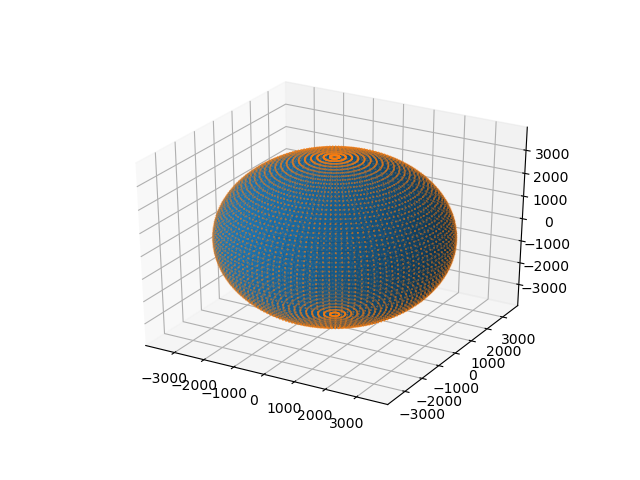

10

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_camera_position(ax):
    """returns the camera position for 3D axes in cartesian coordinates"""
    r = np.square(ax.xy_viewLim.max).sum()
    theta, phi = np.radians((90 - ax.elev, ax.azim))
    return np.array(sph2cart(r, theta, phi), ndmin=2).T

def sph2cart(r, theta, phi):
    """spherical to cartesian transformation."""
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def reorder_camera_distance():
    """
    Sort the patches (via their offsets) by decreasing distance from camera position
    so that the furthest gets drawn first.
    """
    # camera position in xyz
    camera = get_camera_position(ax)
    # distance of patches from camera
    d = np.square(np.subtract(camera, patches._offsets3d)).sum(0)
    o = d.argsort()[::-1]

    patches._offsets3d = tuple(np.array(patches._offsets3d)[:, o])
    patches._facecolor3d = patches._facecolor3d[o]
    patches._edgecolor3d = patches._edgecolor3d[o]

    # todo: similar for linestyles, linewidths, etc.... 

def on_draw(event):
    reorder_camera_distance()

# MWE
#x = np.array([-1, 0, 1])
#y = np.array([0, 0, 0])
#z = y

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
#patches = ax.scatter(x, y, z, s=2500, c=x)

patches1 = ax.plot_surface(x_sph,y_sph,z_sph,rstride=1, cstride=1)
#patches1 = ax.scatter(x_sph,y_sph,z_sph)
patches2 = ax.scatter(x, y, z, s = 0.1, color="C1")

# connect to draw event (re-orders patches each time the canvas draws)
fig.canvas.mpl_connect('draw_event', on_draw)

In [164]:
patches2._offsets3d

(masked_array(data=[136.04176068606478, 135.8583884185915,
                    135.30876595538496, ..., 134.3943749814362,
                    135.30876595538714, 135.85838841859368],
              mask=[False, False, False, ..., False, False, False],
        fill_value=1e+20),
 masked_array(data=[0.0, 7.061086804992933, 14.103138168343131, ...,
                    -21.10716996459346, -14.103138168343417,
                    -7.061086804993033],
              mask=[False, False, False, ..., False, False, False],
        fill_value=1e+20),
 array([ 3477.33987976,  3477.33987976,  3477.33987976, ...,
        -3477.33987976, -3477.33987976, -3477.33987976]))

In [169]:
patches1

<IPython.core.display.Javascript object>


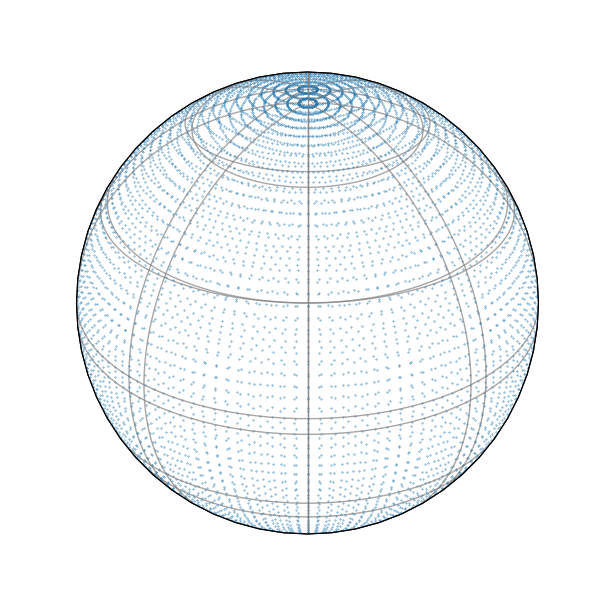

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import cartopy.crs as ccrs
import matplotlib.colors as colors
from matplotlib.colorbar import Colorbar
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(6,6), constrained_layout=False, dpi = 100) # Initiate figure with constrained layout


#ax = fig.add_subplot(gs[0, 0], projection="3d")
#ax.scatter(x, y, z, s = 0.1)
#ax.set_axis_off()

gs = fig.add_gridspec(1, 1, height_ratios=[1], width_ratios=[1]) # Add x-by-y grid

map_proj_1 = ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=30.0, satellite_height=35785831)
map_proj_2 = ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=30.0, satellite_height=100*35785831)

map_projections = [map_proj_1, map_proj_2]

for map_projection in map_projections:

    ax = fig.add_subplot(gs[0, 0], projection=map_projection)

    im = ax.scatter(core.lon, core.lat, s=0.1, c=None, transform=ccrs.PlateCarree(), rasterized=True)
    

    gl_lines = ax.gridlines(draw_labels=False,
    linewidth=1.0, color='gray', alpha=0.7, linestyle='-', x_inline = False, y_inline = True)
    gl_lines.xlines = True
    gl_lines.xlocator = tick.FixedLocator([-180, -135, -90, -45, 0, 45, 90, 135, 180])
    gl_lines.ylocator = tick.FixedLocator([-90, -60, -30, 0, 30, 60, 90])

    ax.patch.set_alpha(0)
#fig.subplots_adjust(left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.2)

fig.show()

In [90]:
core.lon

array([  0.        ,   2.97520661,   5.95041322, ..., 351.07438017,
       354.04958678, 357.02479339])

In [92]:
90 - core.lat

array([  2.24040385,   2.24040385,   2.24040385, ..., 177.75959615,
       177.75959615, 177.75959615])

<IPython.core.display.Javascript object>


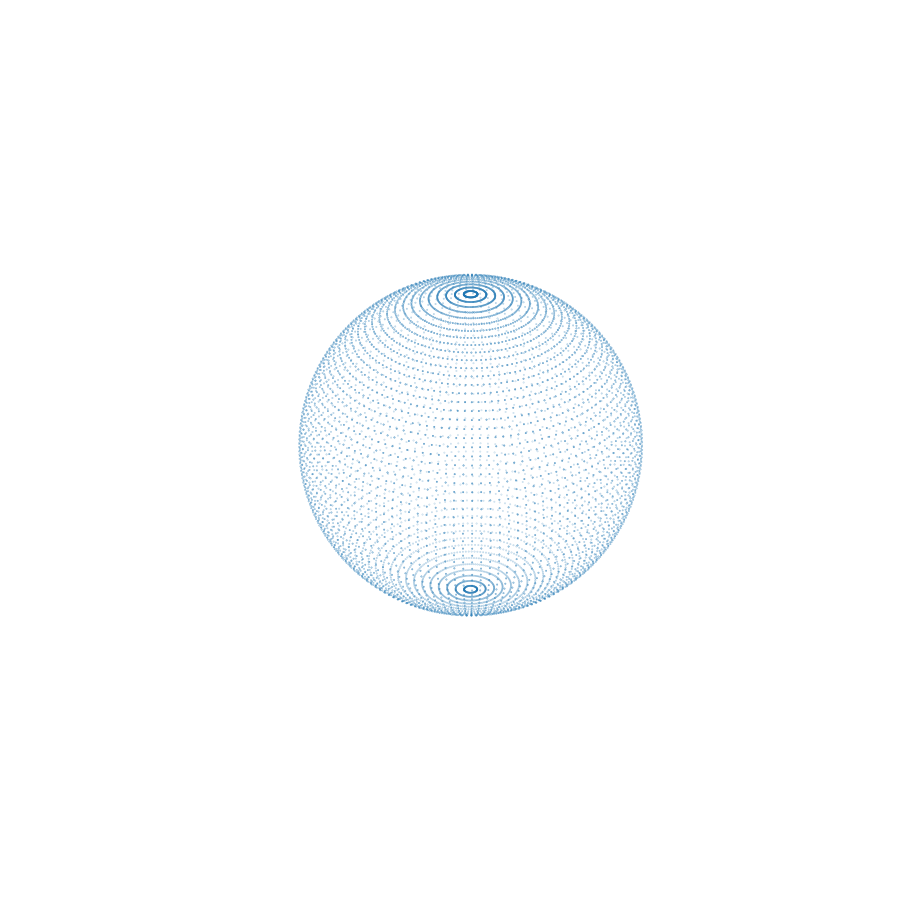

In [112]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#phi = np.linspace(0, np.pi, 100)
#theta = np.linspace(0, 2*np.pi, 100)
#phi, theta = np.meshgrid(phi, theta)

phi = core.lon.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1)*np.pi/180
theta = (90 - core.lat.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1))*np.pi/180

#phi = core.lon*np.pi/180
#theta = (90 - core.lat)*np.pi/180

# The Cartesian coordinates of the unit sphere
x = core.r_cmb*np.sin(theta) * np.cos(phi)
y = core.r_cmb*np.sin(theta) * np.sin(phi)
z = core.r_cmb*np.cos(theta)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=(9,9), dpi = 100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s = 0.1)
# Turn off the axis planes
ax.set_axis_off()
plt.show()

In [5]:
core.condtab(normsize=len(core.data), quantiles = len(core.data), rangn_lim = 3.5, rangv_lim = 0.5)

____semi-variogram setup___

Number of data used: 54479161
Max data distance: 10929.210 km
Lag length chosen: 200.0 km
Number of lags: 54
Number of modelling lags: all

Semi-variogram model determined, starting LUT computation

____semi-variogram setup___

Number of data used: 54479161
Max data distance: 10929.210 km
Lag length chosen: 200.0 km
Number of lags: 54
Number of modelling lags: 20

Semi-variogram model determined, starting LUT computation



<IPython.core.display.Javascript object>


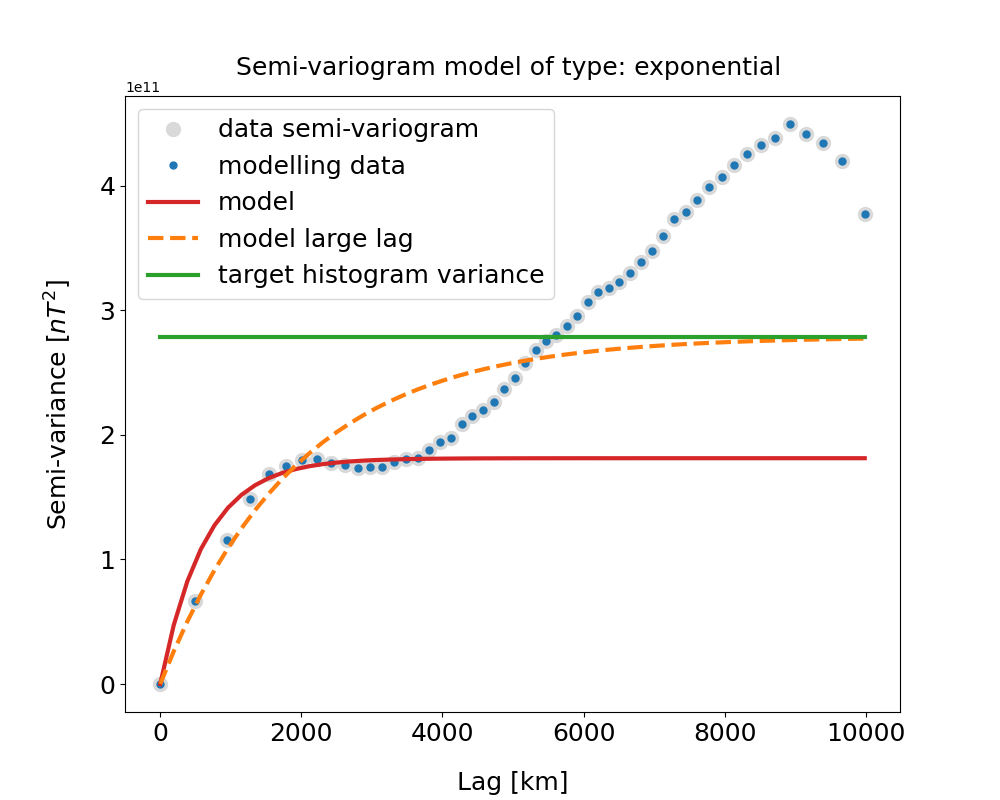

In [9]:
core.semivar(model_lags = "all", model = "exponential", max_dist = 20000, lag_length = 200,
             zero_nugget = True, hit_target_var = True)

keep_sv_curve = core.sv_curve.copy()
keep_lags_sv_curve = core.lags_sv_curve.copy()

C_e_const = 2

nugget = C_e_const**2
nugget_p = 0.01
var_fac = 0.65

#set_model = {"a": 1900, "C0": var_fac*core.target_var*nugget_p, "C1": var_fac*core.target_var*(1-nugget_p), "C2": None, "C3": None}
set_model = {"a": 1900, "C0": nugget, "C1": var_fac*core.target_var-nugget, "C2": None, "C3": None}


core.semivar(model_lags = 20, model = "exponential", max_dist = 20000, lag_length = 200,
             zero_nugget = True, hit_target_var = True, set_model = set_model)



#%% PLOT SEMI-VARIOGRAM
plt.figure(figsize=(10,8)) 
plt.plot(core.lags,core.pics,'o', markersize=10,color = '0.85',label='data semi-variogram')
plt.plot(core.lags_model,core.pics_model,'.',markersize=10,label='modelling data')
plt.plot(core.lags_sv_curve,core.sv_curve,color='C3', linewidth = 3,label='model')
plt.plot(keep_lags_sv_curve,keep_sv_curve,"--",color='C1',linewidth = 3,label='model large lag')

plt.plot(core.lags_sv_curve,np.ones(core.lags_sv_curve.shape)*core.target_var,linewidth = 3, color="C2", label="target histogram variance")
plt.ylabel('Semi-variance $[%s^2]$' % "nT",fontsize=18,labelpad=18)
plt.xlabel('Lag [km]',fontsize=18,labelpad=18)
plt.title("Semi-variogram model of type: %s " % core.model_names[core.model],fontsize=18,y=1.02)
plt.legend(loc='best',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

In [7]:
print(core)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               Finding sparsity by digging into histogram reproduction
class_abs_path:        /home/mikotz/spherical_direct_sequential_simulation
N_SH:                  30
N_SH_secondary:        None
sim_type:              core
grid_glq_zero:         (31,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools:    (31,), Max/Min: 0.10 / 0.01
grid_glq_shape:        (2,), Max/Min: 61.00 / 31.00
grid_glq_w:            (1891,), Max/Min: 0.10 / 0.01
grid_glq_radial:       (1891,), Max/Min: 3480.00 / 3480.00
grid_glq_theta:        (1891,), Max/Min: 175.63 / 4.37
grid_glq_phi:          (1891,), Max/Min: 354.10 / 0.00
grid_glq_N:            1891
grid_glq_nmax:         30
r_grid:                3480.0
grid:                  (1891, 2)
sph_d:                 (1891, 1891)
lon:                 

# Synthetic sat

In [98]:
s_sat = SDSS(comment, N_SH = 30, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_sat.load_swarm("A")

grid_in = np.array([s_sat.swarm_phi, 90-s_sat.swarm_theta]).T
s_sat.make_grid(s_sat.swarm_radius, grid_in, calc_sph_d = False)

#s_sat.grid_equal_area(N_grid= 500, r_at = s_sat.r_sat, poles_remove = True)
#grid_in = np.array([s_sat.grid_eqa_phi, 90-s_sat.grid_eqa_theta]).T
#s_sat.grid(s_sat.r_sat, grid_in, calc_sph_d = False)

In [99]:
s_sat.generate_map(grid_type = "swarm")

In [101]:
s_sat.data += np.random.normal(scale = C_e_const, size = s_sat.data.shape)

<IPython.core.display.Javascript object>


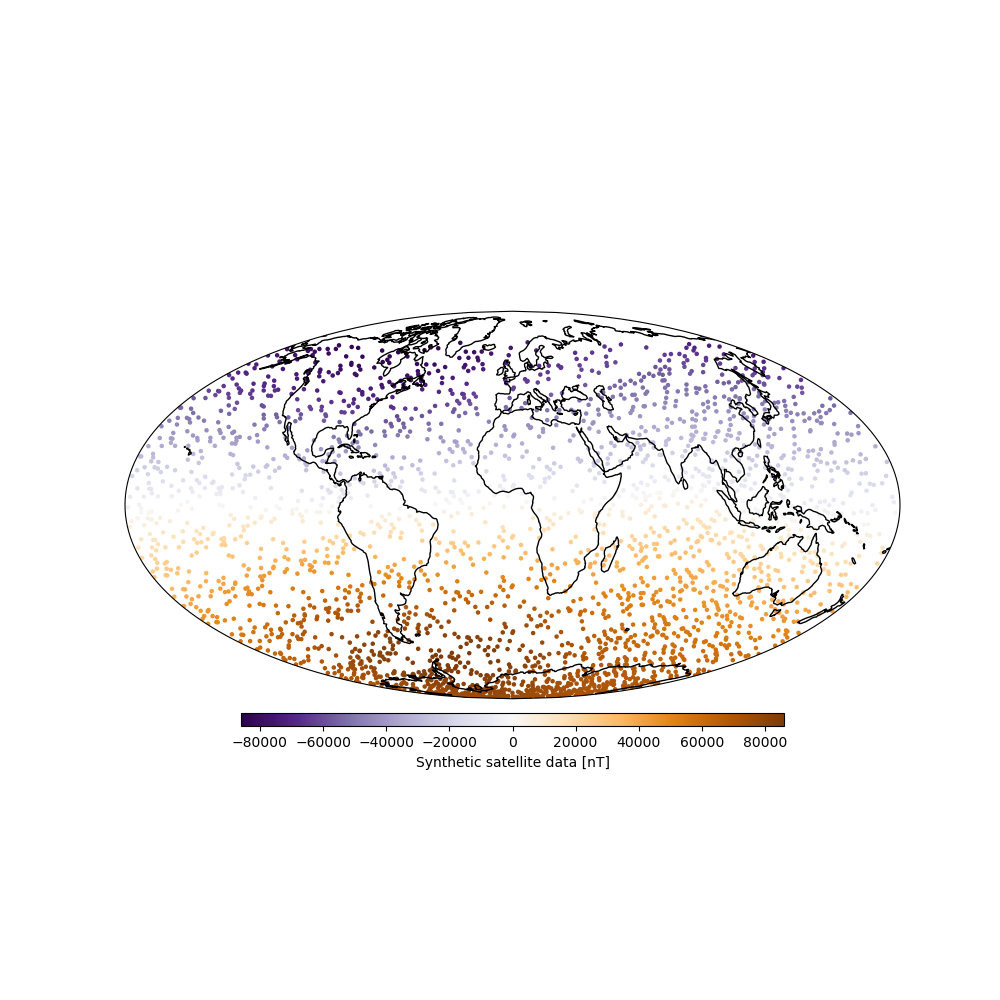

In [102]:
mt_util.plot_cartopy_global(lat = s_sat.lat, lon = s_sat.lon, plot_quality = "high", point_size=5, 
                            data=s_sat.data, cmap = 'PuOr_r', title="Synthetic satellite data")

In [227]:
print(s_sat)


______current attributes______

a:                6371.2
r_sat:            6721.2
r_cmb:            3480.0
rad:              0.017453292519943295
mu0:              1.2566370614359173e-06
comment:          Plots for the implementation section of seqsim article
class_abs_path:   /home/mikotz/spherical_direct_sequential_simulation
N_SH:             30
N_SH_secondary:   None
sim_type:         core
swarm_theta:      (2773,), Max/Min: 177.35 / 22.39
swarm_phi:        (2773,), Max/Min: 179.68 / -179.59
swarm_radius:     (2773,), Max/Min: 6825.19 / 6806.85
swarm_obs:        (2773,), Max/Min: 53117.43 / -48881.72
swarm_N:          2773
r_grid:           (2773,), Max/Min: 6825.19 / 6806.85
grid:             (2773, 2)
sph_d:            None
lon:              (2773,), Max/Min: 179.68 / -179.59
lat:              (2773,), Max/Min: 67.61 / -87.35
N_grid:           2773
B_ensemble_swarm: (2773, 3)
data:             (2773,), Max/Min: 85909.49 / -84352.36
target_var:       2650032519.9717584
target_mea

<IPython.core.display.Javascript object>


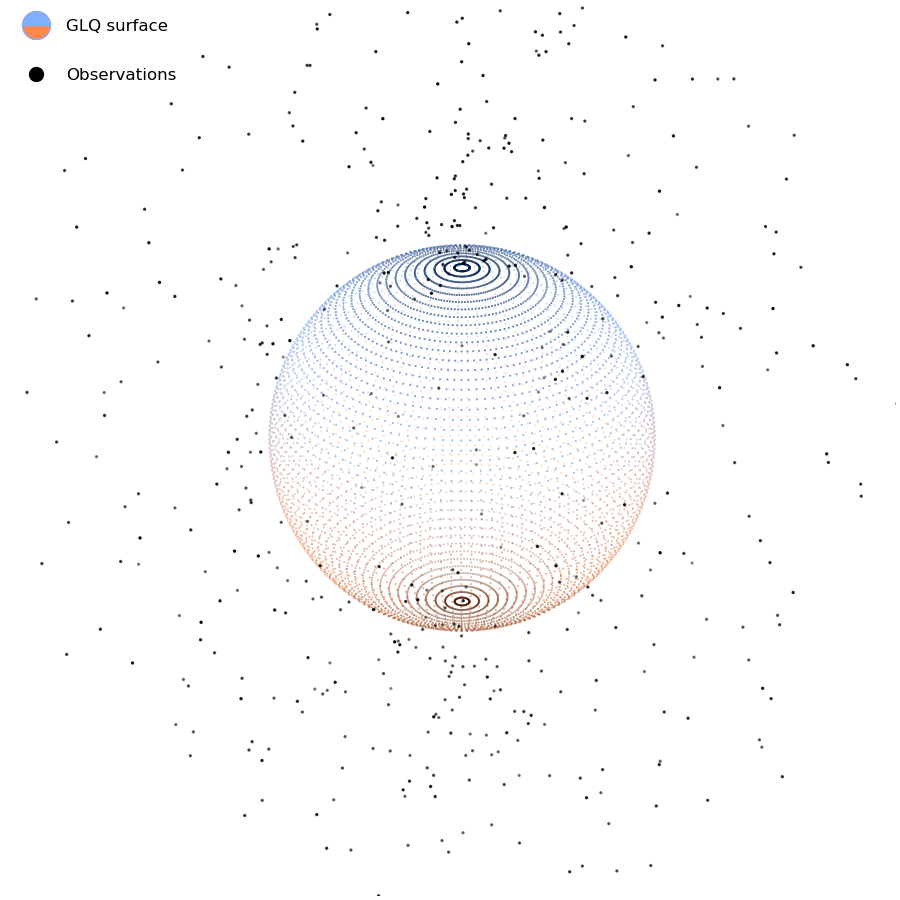

In [57]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

phi = core.lon.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1)*np.pi/180
theta = (90 - core.lat.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1))*np.pi/180

# The Cartesian coordinates of the unit sphere
x = 0.8*np.sin(theta) * np.cos(phi)
y = 0.8*np.sin(theta) * np.sin(phi)
z = 0.8*np.cos(theta)



rand_size = 500
phi_d = np.random.uniform(low = -180, high = 180.0, size = rand_size)*np.pi/180
theta_d = np.random.uniform(low = 0, high = 180.0, size = rand_size)*np.pi/180

#phi_d = s_sat.lon*np.pi/180
#theta_d = (90 - s_sat.lat)*np.pi/180

r_rand_u = np.random.uniform(low = 0.8, high = 2, size = rand_size)

# The Cartesian coordinates of the unit sphere
x_d = r_rand_u*np.sin(theta_d) * np.cos(phi_d)
y_d = r_rand_u*np.sin(theta_d) * np.sin(phi_d)
z_d = r_rand_u*np.cos(theta_d)


cmap = [(0.0,  0.10980392156862745,  0.30196078431372547), 
                   (0.5019607843137255,  0.6862745098039216,  1.0), 
                   (1.0,  0.5372549019607843,  0.30196078431372547), 
                   (0.30196078431372547,  0.10196078431372549,  0.0)]

cmap = colors.LinearSegmentedColormap.from_list("cmap", cmap, N=1000)


fig = plt.figure(figsize=(9,9), dpi = 100, constrained_layout = True)
#ax = fig.add_subplot(111, projection='3d')

gs = fig.add_gridspec(1, 1, height_ratios=[1], width_ratios=[1]) # Add x-by-y grid
ax = fig.add_subplot(gs[0, 0], projection="3d")


sph_glq = ax.scatter(x, y, z, s = 0.2, cmap = cmap, c=theta, marker = "o", rasterized = True)

sph_d = ax.scatter(x_d, y_d, z_d, s = 2.0, color = "k", marker = "o", rasterized = True)

# Turn off the axis planes
ax.set_axis_off()

ax.view_init(elev=30., azim=30)
ax.set_xlim3d(-1, 1)     
ax.set_ylim3d(-1, 1) 
ax.set_zlim3d(-1, 1)

#---- Define First Legend Entry ----

m1, = ax.plot([], [], c=(0.5019607843137255,  0.6862745098039216,  1.0) , marker='o', markersize=20,
              fillstyle='top', linestyle='none')
m2, = ax.plot([], [], c=(1.0,  0.5372549019607843,  0.30196078431372547) , marker='o', markersize=20,
              fillstyle='bottom', linestyle='none')

#---- Define Second Legend Entry ----

m3, = ax.plot([], [], c='k' , marker='o', markersize=10, linestyle='none')

#---- Plot Legend ----

plt.legend(((m2, m1), (m3)), ('GLQ surface', 'Observations'), numpoints=1, labelspacing=2,
          loc='upper left', fontsize=12, frameon=False)


#fig.subplots_adjust(left=0.03, bottom=0.1, right=0.97, top=0.9, wspace = 0.0, hspace=0.0)

#fig.savefig('implementation_geometry.pdf', bbox_inches='tight', dpi = 300) 

#plt.legend()
plt.show()


Gauss-Legendre RMSE:	 1.976591501439


<IPython.core.display.Javascript object>


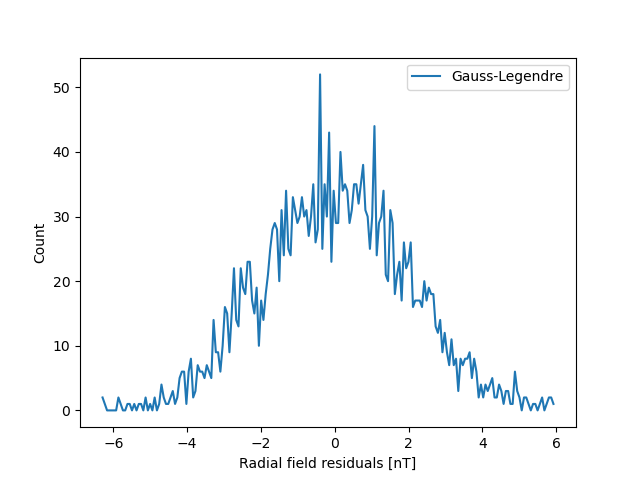

In [13]:
core.integrating_kernel(s_sat, C_e_const = C_e_const)

In [ ]:
N_sim = 1

core.run_sim(N_sim, core.grid_glq_N, core.C_mm_all, core.C_dd, core.C_dm_all, core.G,
        s_sat.data, core.data, scale_m_i = True, unit_d = True, collect_all = True,
        sense_running_error = True, save_string = nb_name)

In [15]:
core.realization_to_sh_coeff(core.r_cmb)

In [16]:
core.covmod_lsq_equiv(s_sat.data, core.C_mm_all, core.G, core.r_cmb)

<IPython.core.display.Javascript object>


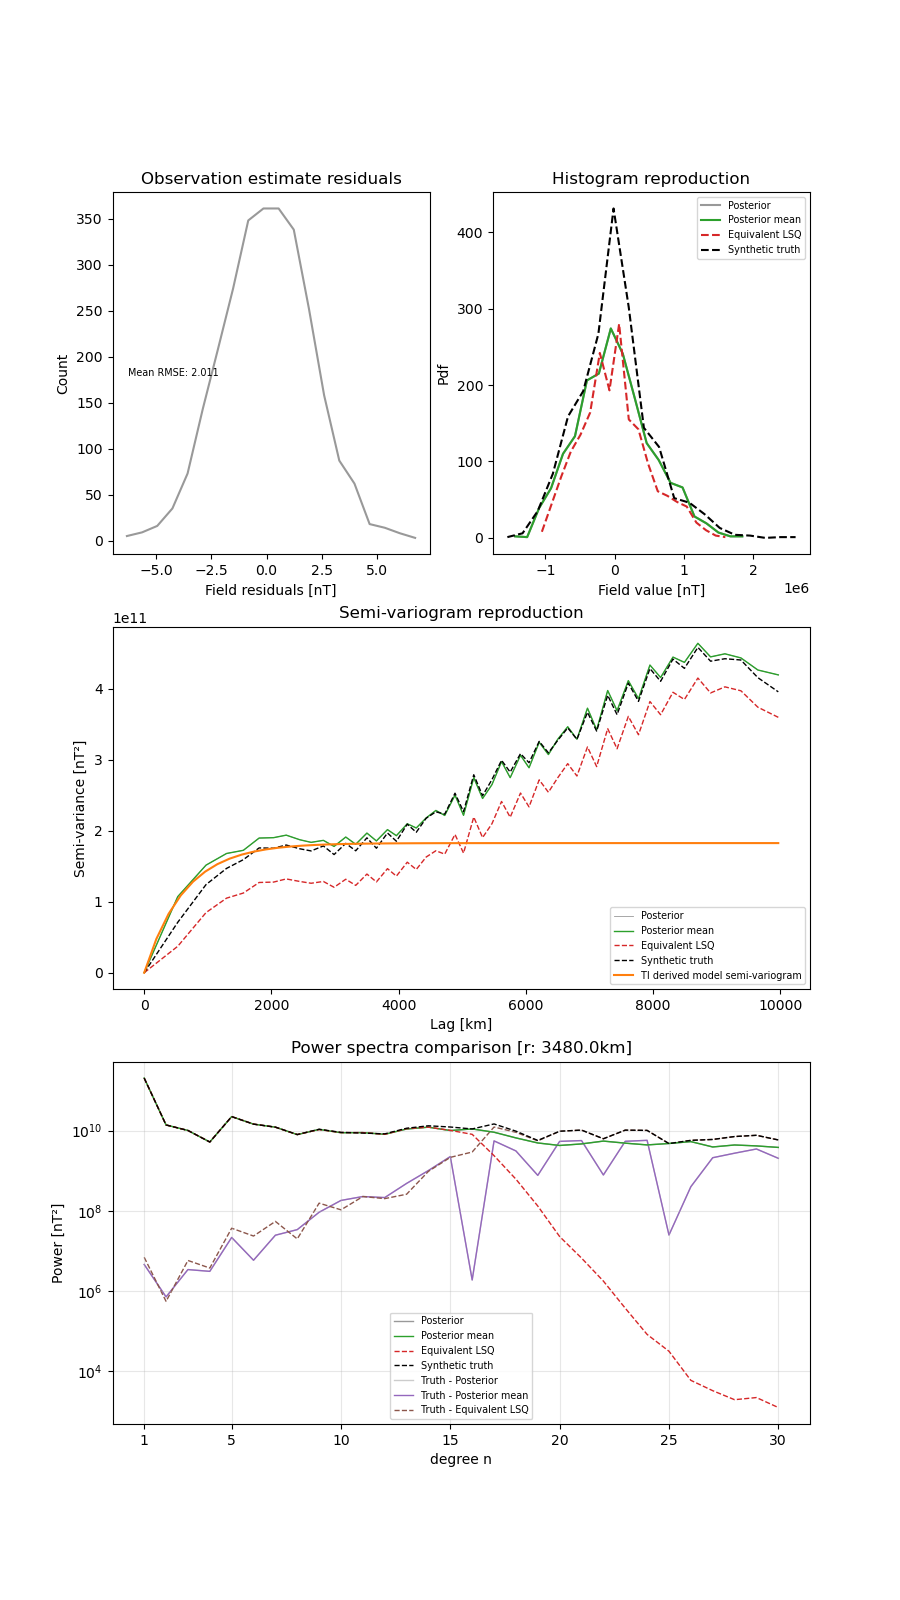

In [17]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

core.grid_glq(nmax = 30, r_at = core.r_cmb)
mt_util.plot_sdssim_reproduce(core, core.m_DSS_res, m_equiv_lsq = core.m_equiv_lsq,
                              lags_use = 1000, spec_r_at = core.r_cmb,
                              model_dict = {}, figsize=(9,16),
                              hist_bins = 20, res_bins = 20,
                              savefig = False, save_string = "core_A_sh30_pdfhist", save_dpi = 100)

# Conditional table investigation

In [31]:
print(core)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               Finding sparsity by digging into histogram reproduction
class_abs_path:        /home/mikotz/spherical_direct_sequential_simulation
N_SH:                  30
N_SH_secondary:        None
sim_type:              core
grid_glq_zero:         (31,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools:    (31,), Max/Min: 0.10 / 0.01
grid_glq_shape:        (2,), Max/Min: 61.00 / 31.00
grid_glq_w:            (1891,), Max/Min: 0.10 / 0.01
grid_glq_radial:       (1891,), Max/Min: 3480.00 / 3480.00
grid_glq_theta:        (1891,), Max/Min: 175.63 / 4.37
grid_glq_phi:          (1891,), Max/Min: 354.10 / 0.00
grid_glq_N:            1891
grid_glq_nmax:         30
r_grid:                3480.0
grid:                  (1891, 2)
sph_d:                 (1891, 1891)
lon:                 

# FIT SV with larger n-range (4.5)

<IPython.core.display.Javascript object>


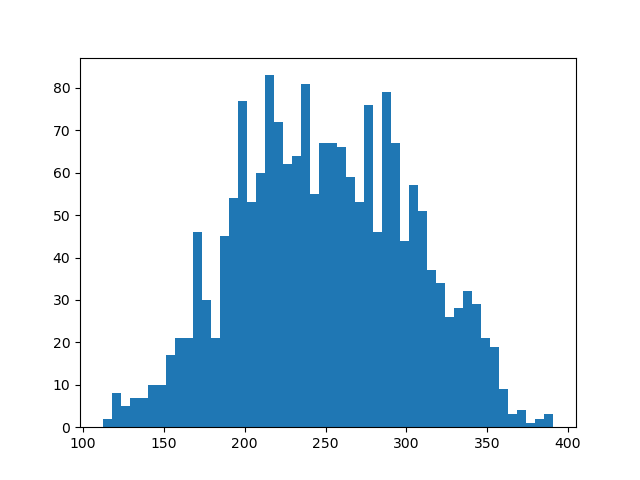

<IPython.core.display.Javascript object>


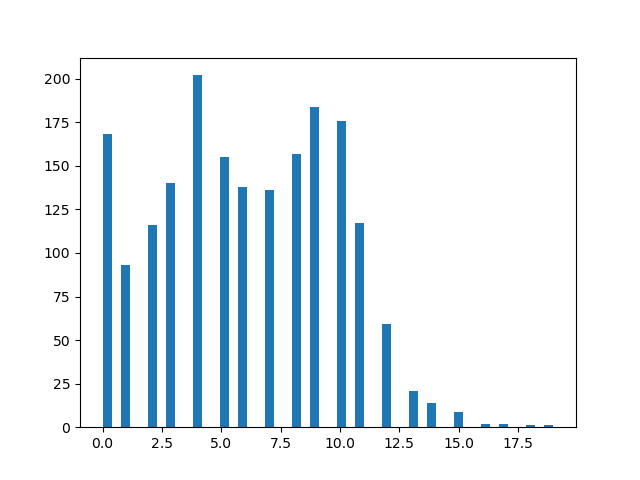

In [18]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=50)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=50)
plt.show()

# FIT SV with lower max semi-variance

<IPython.core.display.Javascript object>


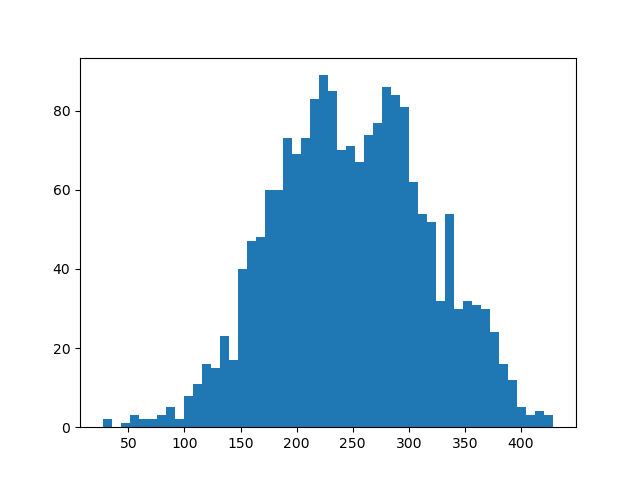

<IPython.core.display.Javascript object>


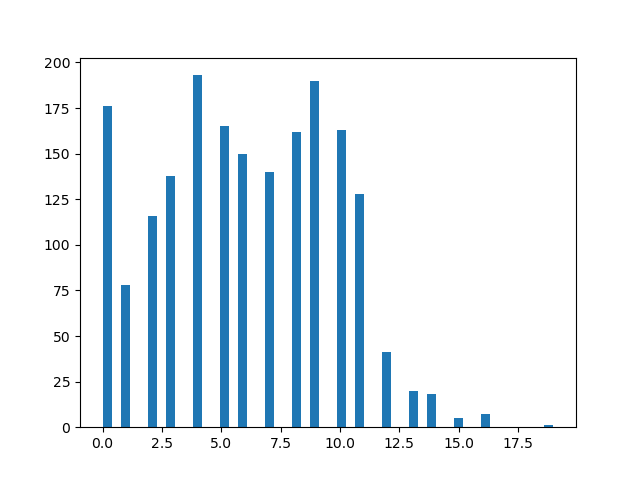

In [20]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=50)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=50)
plt.show()

# Fit SV with 1% nugget

<IPython.core.display.Javascript object>


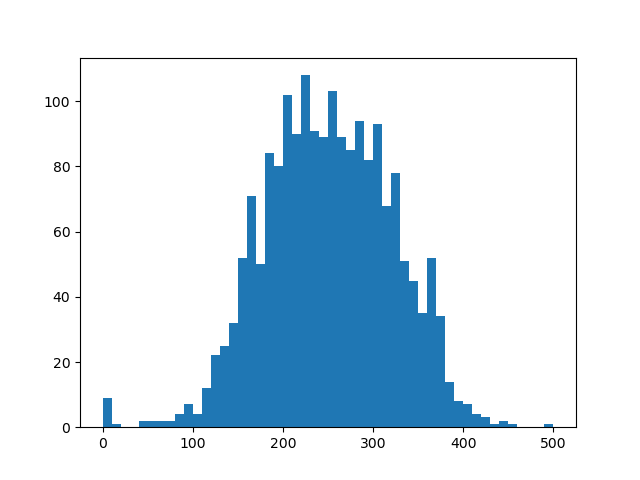

<IPython.core.display.Javascript object>


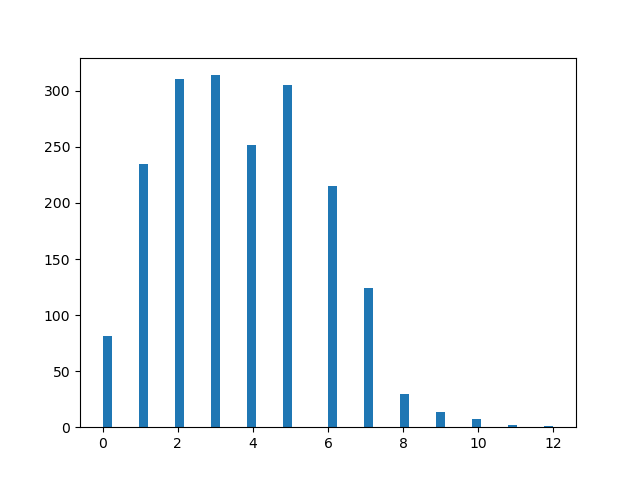

In [42]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=50)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=50)
plt.show()

# Fit SV with 20% nugget

<IPython.core.display.Javascript object>


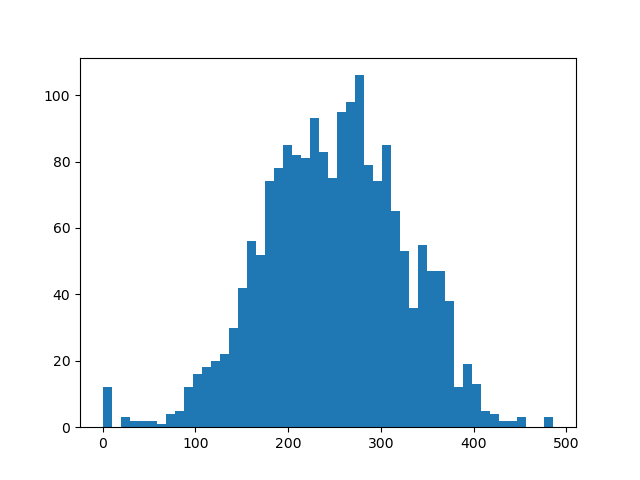

<IPython.core.display.Javascript object>


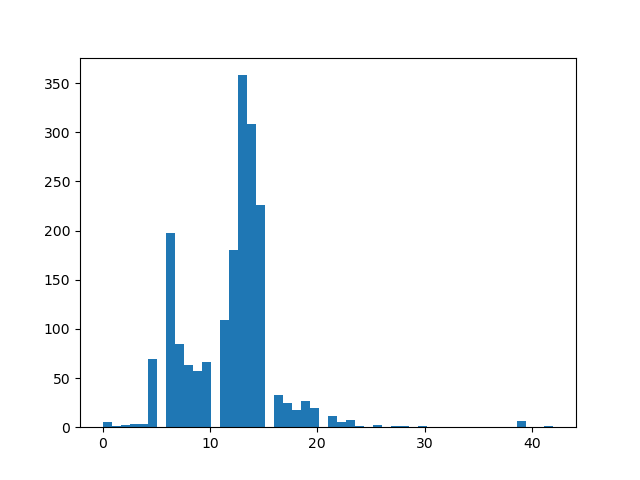

In [21]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=50)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=50)
plt.show()

# Long SV (high correlation for longer lags)

<IPython.core.display.Javascript object>


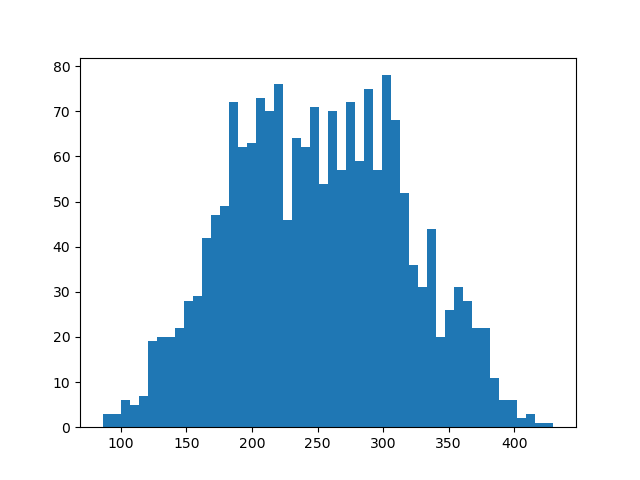

<IPython.core.display.Javascript object>


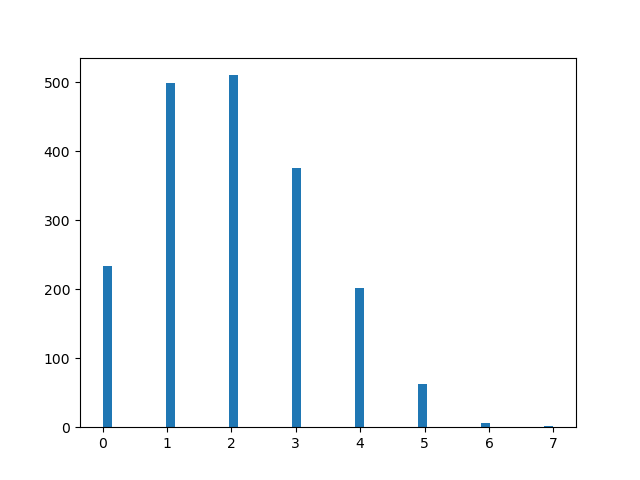

In [46]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=50)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=50)
plt.show()

# Sharp SV (low correlation for longer lags)

<IPython.core.display.Javascript object>


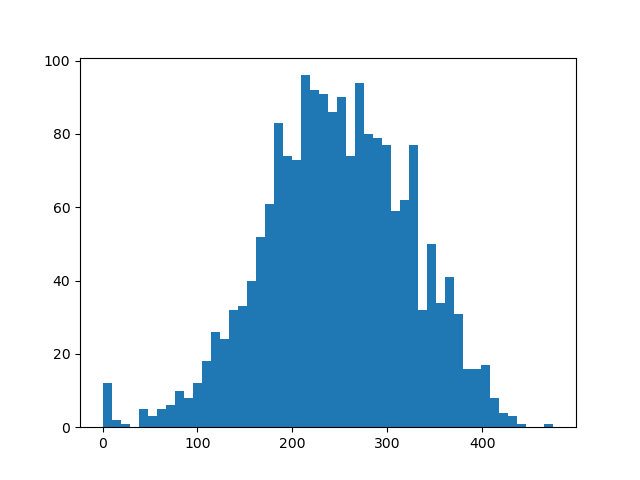

<IPython.core.display.Javascript object>


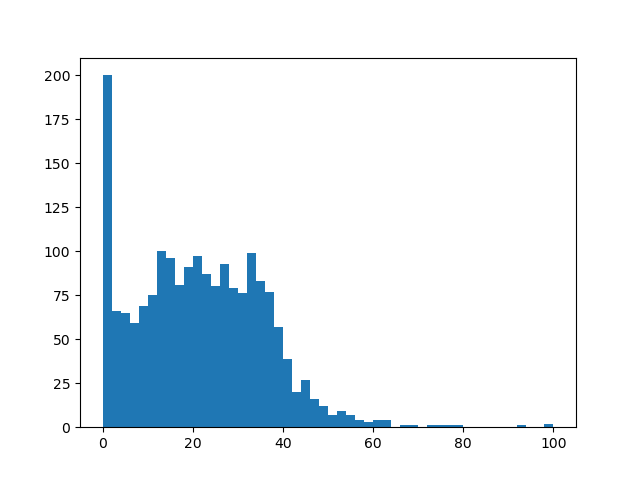

In [37]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=50)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=50)
plt.show()

# Density sampling

<IPython.core.display.Javascript object>


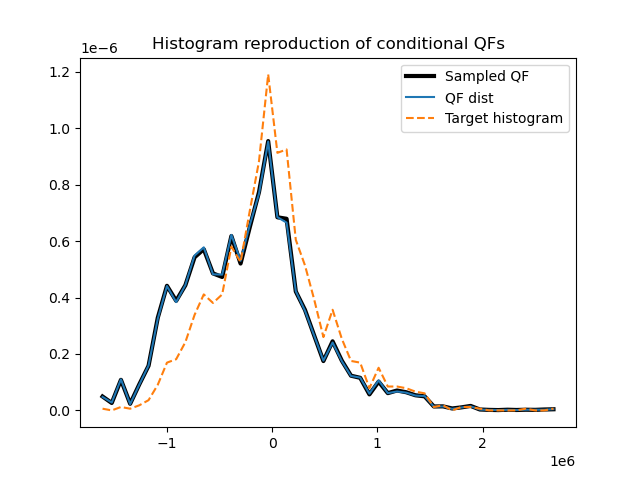

<IPython.core.display.Javascript object>


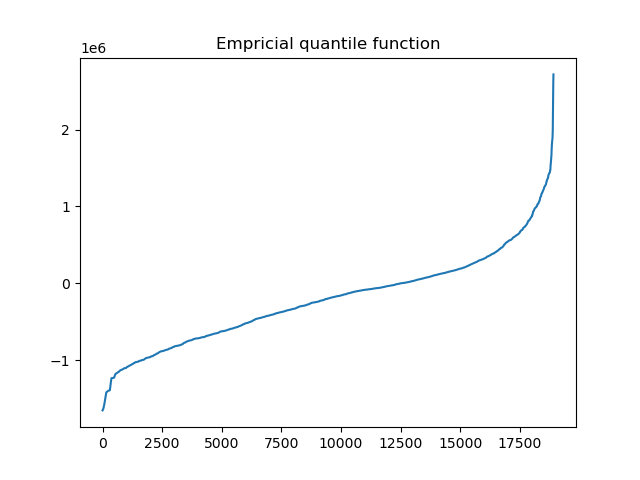

In [20]:
#test_CQF_dist = core.CQF_dist[250,50,:]
#test_CQF_dist = core.CQF_dist[450,50,:]
#test_CQF_dist = core.CQF_dist[50,50,:]
#test_CQF_dist = core.CQF_dist[220,20,:]
test_CQF_dist = core.CQF_dist[220,70,:]

sample_emp_QF = test_CQF_dist[np.random.randint(0,core.condtab_normsize,size=100000)]

hist_bins = 50

plt.figure()

y,binEdges=np.histogram(sample_emp_QF,bins=hist_bins, density = True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-',color = "k", label='Sampled QF', linewidth = 3)  

y,binEdges=np.histogram(test_CQF_dist,bins=hist_bins, density = True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-',color = "C0", label='QF dist')  

y,binEdges=np.histogram(core.data,bins=hist_bins, density = True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'--',color = "C1", label='Target histogram')  

plt.title("Histogram reproduction of conditional QFs")
plt.legend()
plt.show()

plt.figure()
plt.plot(test_CQF_dist)
plt.title("Empricial quantile function")
plt.show()

# Count sampling

<IPython.core.display.Javascript object>


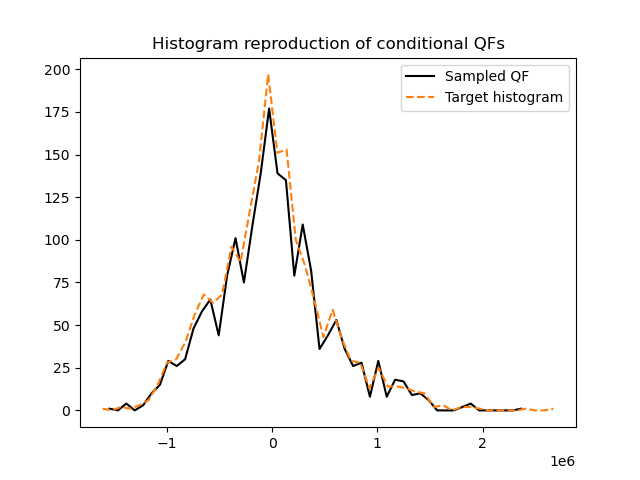

In [22]:
test_CQF_dist = core.CQF_dist[250,50,:]
#test_CQF_dist = core.CQF_dist[450,50,:]
#test_CQF_dist = core.CQF_dist[50,50,:]

sample_emp_QF = test_CQF_dist[np.random.randint(0,core.condtab_normsize,size=len(core.data))]

hist_bins = 50

plt.figure()

y,binEdges=np.histogram(sample_emp_QF,bins=hist_bins, density = False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-',color = "k", label='Sampled QF')  

#y,binEdges=np.histogram(test_CQF_dist,bins=hist_bins, density = True)
#bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
#plt.plot(bincenters,y,'-',color = "C0", label='QF dist')  

y,binEdges=np.histogram(core.data,bins=hist_bins, density = False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'--',color = "C1", label='Target histogram')  

plt.title("Histogram reproduction of conditional QFs")
plt.legend()
plt.show()



In [23]:
# animation
from matplotlib import animation, rc
from IPython.display import HTML, Image, display, Video
import os

In [31]:
samples_emp_QF = []
for j in np.arange(0,core.m_DSS.shape[0]):
    nv_in = core.idx_nv_collect[j]
    test_CQF_dist = core.CQF_dist[nv_in[0],nv_in[1],:]
    samples_emp_QF.append(test_CQF_dist[np.random.randint(0,core.condtab_normsize,size=1)])
    
samples_emp_QF = np.array(samples_emp_QF)

In [32]:
samples_emp_QF.shape

(1891, 1)

In [36]:
plt.close("all")

In [ ]:
def animate_CQF_sampling(core):

    
    rc('animation', html="jshtml", embed_limit = 10*60)
    #c.embed_limit = 10*10
    
    test_CQF_dist = core.CQF_dist[250,50,:]
    #test_CQF_dist = core.CQF_dist[450,50,:]
    #test_CQF_dist = core.CQF_dist[50,50,:]

    hist_bins = 50

    rgb = 1-(np.arange(0,len(core.data))+1)/len(core.data)

    fig = plt.figure(figsize=(6,6), constrained_layout=False, dpi = 100)

    gs = fig.add_gridspec(1, 1, height_ratios=[1], width_ratios=[1]) # Add x-by-y grid

    ax = fig.add_subplot(gs[0, 0])

    samples_emp_QF = []
    for j in np.arange(0,core.m_DSS.shape[0], step = 1):
        nv_in = core.idx_nv_collect[j]
        test_CQF_dist = core.CQF_dist[nv_in[0],nv_in[1],:]
        #samples_emp_QF.append(test_CQF_dist[np.random.randint(0,core.condtab_normsize,size=len(core.data))])
        samples_emp_QF.append(test_CQF_dist[np.random.randint(0,core.condtab_normsize,size=1)])

    samples_emp_QF = np.array(samples_emp_QF)

    y,binEdges=np.histogram(samples_emp_QF[0,:],bins=hist_bins, density = False)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax.plot(bincenters,y,'-',color = (rgb[0],rgb[0],rgb[0]), zorder = rgb[0], label='Sampled QF')  

    def animate(i):
        y,binEdges=np.histogram(samples_emp_QF[:(i+1),:],bins=hist_bins, density = False)
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        cb = ax.plot(bincenters,y,'-',color = (rgb[i+1],rgb[i+1],rgb[i+1]), zorder = rgb[i+1])
        return (cb,)

    y,binEdges=np.histogram(core.data,bins=hist_bins, density = False)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax.plot(bincenters,y,'--',color = "C1", label='Target histogram', zorder = 10)  

    plt.title("Histogram reproduction of conditional QFs")
    plt.legend()

    anim = animation.FuncAnimation(fig, animate, frames=len(core.data)-1, interval=5)
    #anim = animation.FuncAnimation(fig, animate, frames=600, interval=5)
    
    plt.close() # Close the active figure to avoid extra plot
    
    return anim

animate_CQF_sampling(core)

In [24]:
core.rangn[250]

0.0

In [25]:
core.rangv[50]

1.0

In [26]:
def conditional_lookup(self, mu_k, sigma_sq_k, dm, dv, scaling = True):
        #conditional_lookup(self, cond_mean, cond_var, cond_dist, cond_dist_size, mu_k, sigma_sq_k, dm, dv):
        #conditional_lookup(core.CQF_mean, core.CQF_var, core.CQF_dist, core.condtab_normsize, mu_k, sigma_sq_k, dm_c, dv_c)

        #distance = np.power((self.CQF_mean-mu_k)/dm,2)+np.power((self.CQF_var-sigma_sq_k)/dv,2)        
        distance = np.power((self.CQF_mean-mu_k)/dm,2)+abs(self.CQF_var-sigma_sq_k)/np.sqrt(dv)
        #distance = abs(self.CQF_mean-mu_k)/dm+abs(self.CQF_var-sigma_sq_k)/np.sqrt(dv)

        nearest = np.unravel_index(np.argmin(distance),self.CQF_mean.shape)
        idx_n = nearest[0]
        idx_v = nearest[-1]
        
        nearest_dist = self.CQF_dist[idx_n,idx_v,:]
        
        m_i = nearest_dist[np.random.randint(0,self.condtab_normsize,size=1)]

        if scaling == True:
            m_i_mean = self.CQF_mean[idx_n,idx_v]        
            m_i_std = np.sqrt(self.CQF_var[idx_n,idx_v],dtype=np.float64)

            m_k = (m_i - m_i_mean)*np.sqrt(sigma_sq_k)/m_i_std+mu_k
        else:
            m_k = m_i

        return idx_n, idx_v, nearest_dist, m_i, distance

[1316]
257
49


<IPython.core.display.Javascript object>


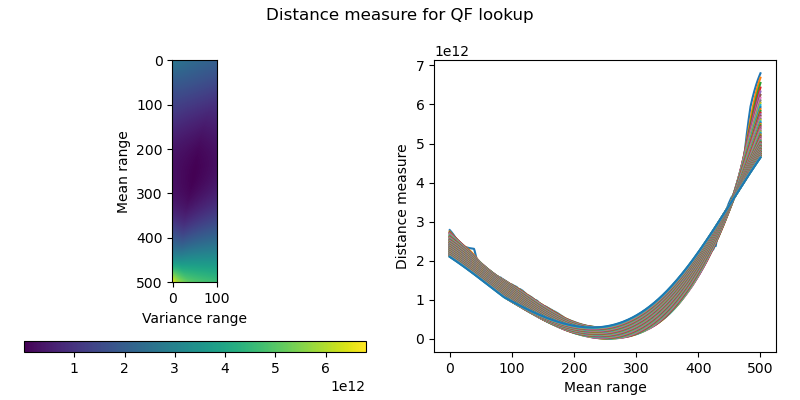

In [28]:
from matplotlib.colorbar import Colorbar

data_min = np.min(core.data)
data_max = np.max(core.data)
dm = data_max - data_min
dv = core.target_var

idx_rand_field_value = np.random.randint(0,len(core.data),size=1)
idx_n, idx_v, nearest_dist, m_i, distance = conditional_lookup(core, core.data[idx_rand_field_value], 
                                                               core.target_var, 1, 1)
                                                               #core.target_var, dm, dv)
print(idx_rand_field_value)
print(idx_n)
print(idx_v)

fig = plt.figure(figsize=(8,4), constrained_layout=False) # Initiate figure with constrained layout
fig.suptitle("Distance measure for QF lookup")

gs = fig.add_gridspec(2, 2, height_ratios=[1,0.05], width_ratios=[1,1]) # Add x-by-y grid
ax_cb = fig.add_subplot(gs[1, 0])

#% RESIDUALS
ax = fig.add_subplot(gs[0, 0])
im = ax.imshow(distance)
#cbax = plt.subplot(gs[0,0]) # Set colorbar position
cb = Colorbar(mappable = im, ax = ax_cb, orientation = "horizontal") # im, ax=ax, 
ax.set_xlabel("Variance range")
ax.set_ylabel("Mean range")
ax = fig.add_subplot(gs[:, 1])
ax.plot(distance)
ax.set_xlabel("Mean range")
ax.set_ylabel("Distance measure")

fig.subplots_adjust(left=0.03, bottom=0.12, right=0.97, top=0.85, wspace = 0.2, hspace=0.5)

plt.show()

In [21]:
core.grid_glq(nmax = 256, r_at = core.r_cmb)
#core.grid_glq(nmax = 120, r_at = core.r_cmb)

core.ensemble_B(core.g_spec, nmax = 30, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble_glq[:,0,:].copy()

#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = 30, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble_glq[:,0].copy()

core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(30)], nmax = 30, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble_glq[:,0].copy()

core.ensemble_B(core.g_lsq_equiv, nmax = 30, r_at = core.r_cmb, grid_type = "glq")
lsq_eqa = core.B_ensemble_glq[:,0].copy()

<IPython.core.display.Javascript object>


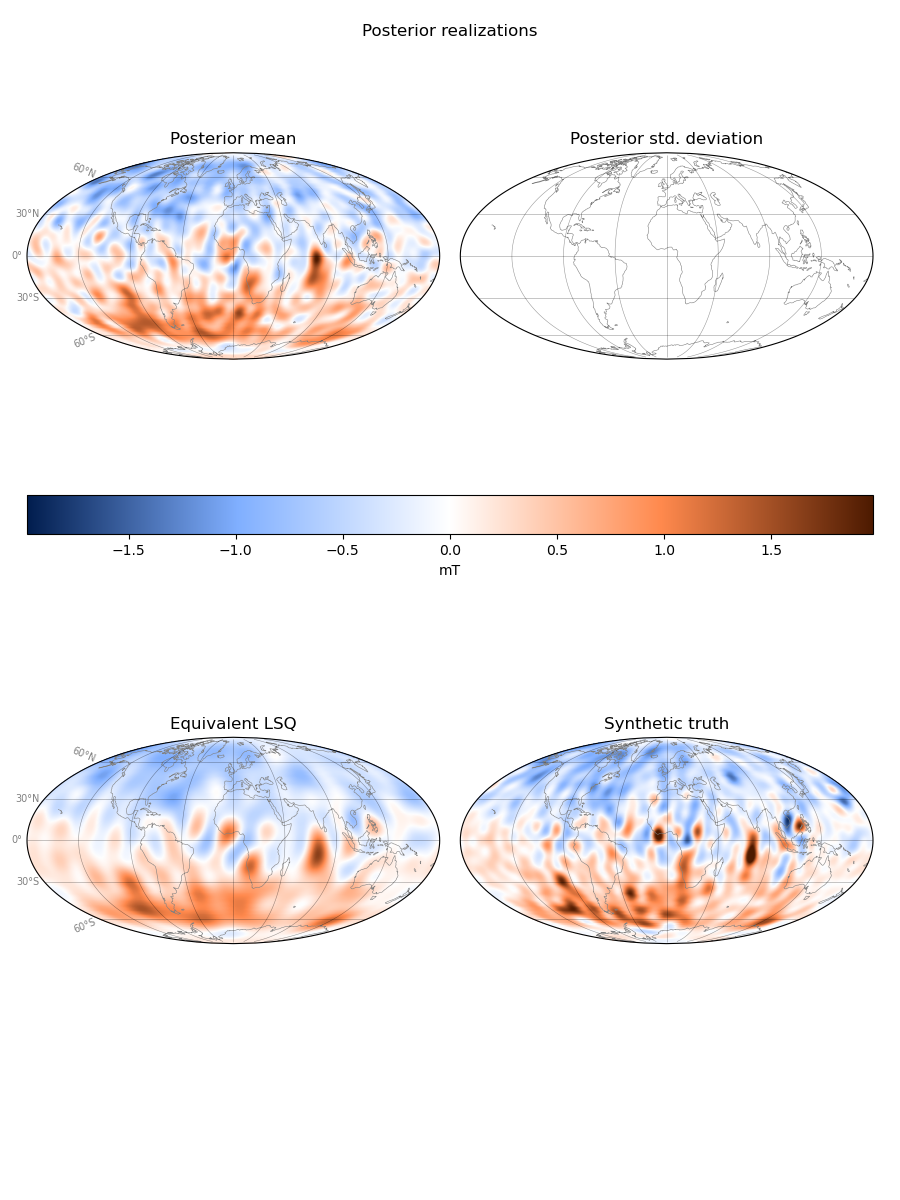

In [22]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_glq_phi, 90-core.grid_glq_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = lsq_eqa, field_mean = zs_mean_eqa,
                        tile_size_row = 1, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 10, cbar_mm_factor = 2/3,
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.2, 
                        savefig = False, save_string = "core_A_sh30_pdfhist", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100)


In [23]:
# SAVE RESULT
#print("\nSaving job")
#file_clip = open("core_{}.obj".format(nb_name), "wb")
#pickle.dump(core, file_clip, protocol=4)
#file_clip.close()

#file_clip = open("sat_{}.obj".format(nb_name), "wb")
#pickle.dump(s_sat, file_clip, protocol=4)
#file_clip.close()
#print("\nJob saved and finished")

In [ ]:
core.kriging_mv_collect